In [1]:
dataDate = '20190605_2028'

dataPath = 'C:/projects/imove/silomatsim/muc/'
microDataPath = '{0}microData/microData_{1}/'.format(dataPath, dataDate) 
outputPath =  '{0}pythonProcessing/output_{1}/'.format(dataPath, dataDate)

In [2]:
import sys
sys.path.append("C:/Program Files/Python36/Lib/site-packages")

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import collections
import statistics
import six
import os
from random import randint

def RandomHead(df, size):
    randomHead = randint(size, len(df))
    return df.head(randomHead)[randomHead-size:randomHead]

def XLS2CSV(filepath, filename, sheet=0):
    df = pd.read_excel(filepath+filename+'.xlsx', sheet_name=sheet)
    df.to_csv(filepath+filename+'.csv', encoding='utf-8', index=False)

class bcolors:
    HEADER = '\033[95m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [3]:
CODE_MALE = 1
CODE_FEMALE = 2
CODE_EMPLOYED = 1 # working
CODE_UNEMPLOYED = 2 # able to work but no jobs, other codes ar eunemployed but seniors, sutedents etc

ABS_PPL_AGE_GROUPS = 18
ABS_PPL_INC_GROUPS = 15
ABS_PPL_IND_GROUPS = 23

ABS_DWELL_STR_GROUPS = 6
ABS_DWELL_BED_GROUPS = 8
ABS_DWELL_RNT_GROUPS = 22
ABS_DWELL_MRG_GROUPS = 21
ABS_DWELL_VEH_GROUPS = 7

In [4]:
def ReadFilePP_SILO():
    # columns to use
    cols = {
        'id': int,
        'hhid': int,
        'age': int,
        'gender': int,
        'relationship':str,
        'race': int,
        'occupation': int,
        'workplace':int,
        'income': int
    }
    # read the data
    df = pd.read_csv(microDataPath + 'pp_2011.csv', usecols = cols.keys(), dtype = cols)
    df = df.rename(columns={'id': 'ppID', 'hhid': 'hhID', 'workplace': 'jjID' })
    df.replace('', np.nan, inplace=True)
    return df

ppSiloDF = ReadFilePP_SILO()
RandomHead(ppSiloDF, 7)

,ppID,hhID,age,gender,relationship,race,occupation,jjID,income
389035,350257,66190,54,2,married,0,1,540083,3403
389036,350258,66190,50,1,married,0,1,170620,7699
389037,350259,66190,20,1,child,0,1,705676,1190
389038,350260,66190,22,1,single,0,1,228222,4991
389039,350261,66191,51,2,married,0,1,271153,3291
389040,350262,66191,50,1,married,0,1,187538,7878
389041,350263,66191,20,1,child,0,1,252484,1195


In [5]:
def ReadFilePP_ABS():
    # columns to use
    cols = {
        'id': int,
        'hhid': int,
        'age': int,
        'gender': int,
        'relationship':str,
        'race': int,
        'occupation': int,
        'workplace':int,
        'income': int,
        'code_industry': int,
        'pp_industry': int
    }
    # read the data
    df = pd.read_csv(microDataPath + 'abs_pp_2011.csv', usecols = cols.keys(), dtype = cols)
    df = df.rename(columns={'id': 'ppID', 'hhid': 'hhID', 'workplace': 'jjID' })
    df.replace('', np.nan, inplace=True)
    return df

ppDF = ReadFilePP_ABS()
RandomHead(ppDF, 7)

,ppID,hhID,age,gender,relationship,race,occupation,jjID,income,code_industry,pp_industry
16674,381536,573985,19,1,10,0,2,-1,2,22,-1
16675,1524920,573985,37,2,10,0,3,-1,13,22,-1
16676,1536748,573985,30,2,10,0,4,-1,13,22,-1
16677,1508993,573985,13,1,10,0,5,-1,14,22,-1
16678,739547,573985,33,1,10,0,1,298998,11,7,7
16679,739548,573985,37,2,10,0,4,-1,13,22,-1
16680,739549,573985,25,1,10,0,1,278137,11,5,5


In [6]:
def ReadFileDD_SILO():
    # columns to use
    cols = {
        'id': int,
        'zone': int,
        'type': int,
        'hhID': int,
        'bedrooms':int,
        'quality': int,
        'monthlyCost': int
    }
    # read the data
    df = pd.read_csv(microDataPath + 'dd_2011.csv', usecols = cols.keys(), dtype = cols)
    df = df.rename(columns={'id': 'ddID'})
    df.replace('', np.nan, inplace=True)
    return df

ddSiloDF = ReadFileDD_SILO()
RandomHead(ddSiloDF, 7)

,ddID,zone,type,hhID,bedrooms,quality,monthlyCost
155494,156090,5114912,1,156090,4,2,224
155495,156091,5115210,1,156091,4,2,255
155496,156092,5118010,1,156092,4,2,210
155497,156093,5115319,1,156093,4,2,288
155498,156094,5119112,1,156094,4,2,238
155499,156095,5115922,1,156095,4,2,216
155500,156096,5118027,1,156096,4,2,151


In [7]:
def ReadFileDD_ABS():
    # columns to use
    cols = {
        'id': int,
        'zone': int,
        'type': int,
        'hhID': int,
        'bedrooms':int,
        'quality': int,
        'monthlyCost': int,
        'rent': int,
        'mortgage': int,
        'autos': int,
        'ddRent': int,
        'ddMortgage': int,
    }
    # read the data
    df = pd.read_csv(microDataPath + 'abs_dd_2011.csv', usecols = cols.keys(), dtype = cols)
    df = df.rename(columns={'id': 'ddID'})
    df.replace('', np.nan, inplace=True)
    return df

ddDF = ReadFileDD_ABS()
RandomHead(ddDF, 7)

,ddID,zone,type,hhID,bedrooms,quality,monthlyCost,rent,mortgage,autos,ddRent,ddMortgage
207264,208658,5109504,2,208658,2,3,1435,22,10,3,0,1435
207265,208659,5108924,2,208659,2,3,1512,22,10,3,0,1512
207266,208660,5110517,2,208660,2,3,1493,22,10,3,0,1493
207267,208661,5110334,2,208661,2,3,1429,22,10,3,0,1429
207268,208662,5110827,2,208662,2,3,1592,22,10,3,0,1592
207269,208663,5108642,2,208663,2,3,1453,22,10,3,0,1453
207270,208664,5109525,2,208664,2,3,1437,22,10,3,0,1437


# Stats

In [29]:
basicStats = {
    'Group': [],
    'Property': [],
    'ABS min': [],
    'ABS avg': [],
    'ABS max': [],
    'SILO min': [],
    'SILO avg': [],
    'SILO max': [],
    
}

# stats on a column
def statsOnColumn(colvals):
    tmpStats = {}
    for val in colvals:
        if val in tmpStats:
            tmpStats[val] += 1
        else:
            tmpStats[val] = 1
    tmpStats = collections.OrderedDict(sorted(tmpStats.items()))
    return tmpStats

# stats on occupation
def ppStatsOccupation():
    ppSiloOccupation = ppSiloDF.occupation.values
    occStats = statsOnColumn(ppSiloOccupation)     
    pieOccVals = occStats.values()
    pieOccLabs = ['Toddler', 'Employed', 'Unemployed', 'Student', 'Retired'] # occStats.keys()
    plt.pie(pieOccVals, labels=pieOccLabs,  autopct='%1.1f%%', shadow=True, startangle=0)
    plt.title('SILO pp_2011 - Occupation')
    plt.show()

# people who are employed but they don't have a job
def ppEmployedPeople():
    s = len(ppSiloDF.loc[(ppSiloDF['jjID'] == -1) & (ppSiloDF['occupation'] == CODE_EMPLOYED)])
    if s > 0:
        return ':( There are {0} people who are employed but are without a job.'.format(s)
    else:
        return ':) All employed people have a job.'

def ddStatsType():
    ddSiloTypes = ddSiloDF.type.values
    statsD = statsOnColumn(ddSiloTypes)     
    pieVals = statsD.values()
    pieLabs = ['House', 'Semi-detached', 'Flat, Unit, Apartment', 'Other', 'Not stated', 'Not applicable'] # statsD.keys()
    plt.pie(pieVals, labels=pieLabs,  autopct='%1.1f%%', shadow=True, startangle=0)
    plt.title('SILO dd_2011 - Dwelling Types')
    plt.show()
    
def ddStatsBedrooms():
    ddSiloBeds = ddSiloDF.bedrooms.values
    statsD = statsOnColumn(ddSiloBeds)
    pieVals = statsD.values()
    pieLabs = statsD.keys()
    plt.pie(pieVals, labels=pieLabs,  autopct='%1.1f%%', shadow=True, startangle=0)
    plt.title('Dwellings 2011 - Bedrooms (SILO)')
    plt.show()
    
    basicStats['Group'].append('Dwelling')
    basicStats['Property'].append('Bedrooms')
    basicStats['ABS min'].append(min(ddDF.bedrooms.values))
    basicStats['ABS avg'].append(statistics.mean(ddDF.bedrooms.values))
    basicStats['ABS max'].append(max(ddDF.bedrooms.values))
    basicStats['SILO min'].append(min(ddSiloDF.bedrooms.values))
    basicStats['SILO avg'].append(statistics.mean(ddSiloDF.bedrooms.values))
    basicStats['SILO max'].append(max(ddSiloDF.bedrooms.values))

def ddRent():
    basicStats['Group'].append('Dwelling')
    basicStats['Property'].append('Rent')
    basicStats['ABS min'].append(min(ddDF.rent.values))
    basicStats['ABS avg'].append(statistics.mean(ddDF.rent.values))
    basicStats['ABS max'].append(max(ddDF.rent.values))
    basicStats['SILO min'].append(min(ddDF.ddRent.values))
    basicStats['SILO avg'].append(statistics.mean(ddDF.ddRent.values))
    basicStats['SILO max'].append(max(ddDF.ddRent.values))

def ddMortgage():
    basicStats['Group'].append('Dwelling')
    basicStats['Property'].append('Mortgage')
    basicStats['ABS min'].append(min(ddDF.mortgage.values))
    basicStats['ABS avg'].append(statistics.mean(ddDF.mortgage.values))
    basicStats['ABS max'].append(max(ddDF.mortgage.values))
    basicStats['SILO min'].append(min(ddDF.ddMortgage.values))
    basicStats['SILO avg'].append(statistics.mean(ddDF.ddMortgage.values))
    basicStats['SILO max'].append(max(ddDF.ddMortgage.values))
    
def ddPrice():
    basicStats['Group'].append('Dwelling')
    basicStats['Property'].append('Monthly Cost')
    basicStats['ABS min'].append('')
    basicStats['ABS avg'].append('')
    basicStats['ABS max'].append('')
    basicStats['SILO min'].append(min(ddSiloDF.monthlyCost.values))
    basicStats['SILO avg'].append(statistics.mean(ddSiloDF.monthlyCost.values))
    basicStats['SILO max'].append(max(ddSiloDF.monthlyCost.values))
    
def ddQuality():
    statsD = statsOnColumn(ddSiloDF.quality.values)
    pieVals = statsD.values()
    pieLabs = statsD.keys()
    plt.pie(pieVals, labels=pieLabs,  autopct='%1.1f%%', shadow=True, startangle=0)
    plt.title('Dwellings 2011 - Quality (SILO)')
    plt.show()
    
    basicStats['Group'].append('Dwelling')
    basicStats['Property'].append('Quality')
    basicStats['ABS min'].append('')
    basicStats['ABS avg'].append('')
    basicStats['ABS max'].append('')
    basicStats['SILO min'].append(min(ddSiloDF.quality.values))
    basicStats['SILO avg'].append(statistics.mean(ddSiloDF.quality.values))
    basicStats['SILO max'].append(max(ddSiloDF.quality.values))
    
def ddCars():
    statsD = statsOnColumn(ddDF.autos.values)
    pieVals = statsD.values()
    pieLabs = statsD.keys()
    plt.pie(pieVals, labels=pieLabs,  autopct='%1.1f%%', shadow=True, startangle=0)
    plt.title('Dwellings 2011 - Quality (SILO)')
    plt.show()
    
    basicStats['Group'].append('Household')
    basicStats['Property'].append('Vehicles')
    basicStats['ABS min'].append(min(ddDF.autos.values))
    basicStats['ABS avg'].append(statistics.mean(ddDF.quality.values))
    basicStats['ABS max'].append(max(ddDF.autos.values))
    basicStats['SILO min'].append('')
    basicStats['SILO avg'].append('')
    basicStats['SILO max'].append('')


# Distribution

In [9]:
ppDistDF = pd.merge(ppDF, ddDF, on='hhID')
RandomHead(ppDistDF, 5)

,ppID,hhID,age,gender,relationship,race,occupation,jjID,income,code_industry,...,zone,type,bedrooms,quality,monthlyCost,rent,mortgage,autos,ddRent,ddMortgage
1160982,1132084,311142,33,2,1,0,3,-1,6,22,...,5104215,1,3,3,4079,22,21,2,0,0
1160983,1132085,311143,33,1,1,0,3,-1,6,22,...,5106513,1,3,3,1502,22,21,2,0,0
1160984,1132086,311143,33,2,1,0,3,-1,6,22,...,5106513,1,3,3,1502,22,21,2,0,0
1160985,1132087,311144,33,1,1,0,3,-1,6,22,...,5103409,1,3,3,4171,22,21,2,0,0
1160986,1132088,311144,33,2,1,0,3,-1,6,22,...,5103409,1,3,3,4171,22,21,2,0,0


In [10]:
def convertAgeABS2TB(ageCode):
    if(ageCode >= 0 and ageCode <= 4):
        return 1
    elif(ageCode >= 5 and ageCode <= 9):
        return 2
    elif(ageCode >= 10 and ageCode <= 14):
        return 3
    elif(ageCode >= 15 and ageCode <= 19):
        return 4
    elif(ageCode >= 20 and ageCode <= 24):
        return 5
    else:
        return ageCode - 19
    
def sumZonePopulation(z):
    zoneColsGender = z.gender.values
    zoneColsAge = z.age.values
    zoneColsIncome = z.income.values
    zoneColsIndustry = z.code_industry.values
        
    zoneMales = 0
    zoneFemales = 0
    zoneAgeGroups = [0]*(ABS_PPL_AGE_GROUPS)
    zoneIncGroups = [0]*(ABS_PPL_INC_GROUPS)
    zoneIndGroups = [0]*(ABS_PPL_IND_GROUPS)

    for row in range(len(z)):
        # calculate gender totals
        if zoneColsGender[row] == CODE_MALE:
            zoneMales += 1
        else:
            zoneFemales += 1
        # calculate age totals
        zoneAgeGroups[convertAgeABS2TB(zoneColsAge[row])-1] += 1
        # calculate income totals
        zoneIncGroups[zoneColsIncome[row]-1] += 1
        # calculate industry totals
        zoneIndGroups[zoneColsIndustry[row]-1] += 1
        
    return zoneMales, zoneFemales, zoneAgeGroups, zoneIncGroups, zoneIndGroups

def sumZoneDwellings(z):
    zoneColsHH = z.hhID.values
    zoneColsSTR = z.type.values
    zoneColsBED = z.bedrooms.values
    zoneColsRNT = z.rent.values
    zoneColsMRG = z.mortgage.values
    zoneColsVEH = z.autos.values
    
    zoneDwellSTR = [0]*ABS_DWELL_STR_GROUPS
    zoneDwellBED = [0]*ABS_DWELL_BED_GROUPS
    zoneDwellRNT = [0]*ABS_DWELL_RNT_GROUPS
    zoneDwellMRG = [0]*ABS_DWELL_MRG_GROUPS
    zoneDwellVEH = [0]*ABS_DWELL_VEH_GROUPS

    for row in range(len(z)):
        # if not unoccupied dwelling
        if zoneColsHH[row] is not -1: # wab non priv dwells?
            # add structure totals
            zoneDwellSTR[zoneColsSTR[row]-1] += 1
            # add bedroom totals
            zoneDwellBED[zoneColsBED[row]] += 1
            # add rent totals
            zoneDwellRNT[zoneColsRNT[row]-1] += 1
            # add mortgage totals
            zoneDwellMRG[zoneColsMRG[row]-1] += 1
            # add vehicles totals
            zoneDwellVEH[zoneColsVEH[row]] += 1
    
    return zoneDwellSTR, zoneDwellBED, zoneDwellRNT, zoneDwellMRG, zoneDwellVEH

In [11]:
# people & dwelling from pp and dd
zones = ppDistDF['zone'].unique()
zoneCounts = {}

for i in range(len(zones)):
    # get the zone number
    zone = zones[i]
    
    # find people that belong to that zone
    z1 = ppDistDF.loc[ppDistDF['zone'] == int(zone)]
    # sum stats for that zone
    zoneMales, zoneFemales, zoneAgeGroups, zoneIncGroups, zoneIndGroups = sumZonePopulation(z1)
    
    # find dwellings that belong to that zone
    z2 = ddDF.loc[ddDF['zone'] == int(zone)]
    # sum dwelling stats for that zone
    zoneDwellSTR, zoneDwellBED, zoneDwellRNT, zoneDwellMRG, zoneDwellVEH = sumZoneDwellings(z2)
    
    # add general count
    zoneCounts[zone] = {
        'populationTotal': len(z1),
        'maleTotal': zoneMales,
        'femaleTotal': zoneFemales,
        'pplAgeTotal': zoneAgeGroups,
        'pplIncomeTotal': zoneIncGroups,
        'pplIndustryTotal': zoneIndGroups,
        'dwellTotal': len(z2),
        'dwellStructureTotal': zoneDwellSTR,
        'dwellBedroomsTotal': zoneDwellBED,
        'dwellRentTotal': zoneDwellRNT,
        'dwellMortgageTotal': zoneDwellMRG,
        'dwellVehicleTotal': zoneDwellVEH
    }

In [12]:
# --- Comparision
def calcStats_SP_TB(df, ABS_DWELL_CAT_GROUPS, colName, colNameStartOffset, totalNameSP):
    # store info
    categoryGroupSA1 = []
    categoryGroupsActual = []
    categoryGroupsSP = []
    categoryGroupsDiff = []
    categoryGroupsDiffTotal = []
    categoryGroupsTotalPop = 0

    # for each SA1 (row)
    for i in range(len(df)):
        # get the SA1
        SA1 = df.SA1.values[i]
        
        # difference between SA1s in SP and TB
        categoryTB = {}
        categorySP = {}
        categoryDiff = {}
        categoryTotalDiff = 0
        
        # traverse the category group columns
        for j in range(ABS_DWELL_CAT_GROUPS):
            # get the numbers for each dwelling cat in this zone in TB
            categoryTB[j] = df['{0}_{1}'.format(colName, j+colNameStartOffset)].values[i]
            categoryGroupsTotalPop += categoryTB[j]

            # check if zone exists in SP
            if SA1 in zoneCounts:
                # get the numbers for each age group in this zone in SP
                categorySP[j] = zoneCounts[SA1][totalNameSP][j]
            else:
                # fill the array with 0s
                categorySP[j] = 0

            # calc differences on each level
            categoryDiff[j] = abs(categoryTB[j] - categorySP[j])

            # sum differences across all income groups for this zone
            categoryTotalDiff += categoryDiff[j]

        categoryGroupSA1.append(SA1)
        categoryGroupsActual.append(categoryTB)
        categoryGroupsSP.append(categorySP)
        categoryGroupsDiff.append(categoryDiff)
        categoryGroupsDiffTotal.append(categoryTotalDiff)
        
    return categoryGroupSA1, categoryGroupsActual, categoryGroupsSP, categoryGroupsDiff, categoryGroupsDiffTotal, categoryGroupsTotalPop

def calcStatsTotal(df, colName, spName):
    countCatSA1 = []
    countCatActual = []
    countCatSP = []
    countCatDiff = []
    countCatDiffTotal = 0
    countCatTotalPop = 0

    for i in range(len(df)):
        SA1 = df.SA1.values[i]

        # TOTAL COUNT
        countTB = df[colName].values[i]
        countSP = 0
        # check if zone exists in SP
        if SA1 in zoneCounts:
            countSP = zoneCounts[SA1][spName]
        # append values
        countCatSA1.append(SA1)
        countCatActual.append(countTB)
        countCatSP.append(countSP)
        countCatDiff.append(abs(countTB - countSP))
        countCatDiffTotal += abs(countTB - countSP)
        countCatTotalPop += countTB

    return countCatSA1, countCatActual, countCatSP, countCatDiff, countCatDiffTotal, countCatTotalPop,

## People

In [13]:
def readPeopleTB2011():
    # read the data
    df = pd.read_csv(dataPath + 'pythonProcessing/out_TB_peopleBySA1_2011.csv')#, usecols = columns.keys(), dtype = columns)
    return df

peopleTB_DF = readPeopleTB2011()
peopleTB_DF.head(5)

,SA1,SA4,Male,Female,age_1,age_2,age_3,age_4,age_5,age_6,...,industry_19,industry_20,industry_21,industry_22,industry_23,Count,sex_total,age_total,income_total,industry_total
0,5103001,49,73,164,0,0,0,0,0,3,...,0,0,0,212,5,238,237,227,233,230
1,5103002,49,174,181,11,21,38,44,24,10,...,3,3,0,182,8,353,355,355,351,347
2,5103003,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5103004,49,32,46,0,0,30,40,0,3,...,0,0,0,62,0,78,78,77,73,75
4,5103005,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# gender

colSA1 = []
colActualT = []
colActualM = []
colActualF = []
colSPT = []
colSPM = []
colSPF = []
colTDiff = [] # difference on total population level
colMDiff = [] # difference on male population
colFDiff = [] # difference on female population

for i in range(len(peopleTB_DF)):
    SA1 = peopleTB_DF.SA1.values[i]
    males = peopleTB_DF.Male.values[i]
    females = peopleTB_DF.Female.values[i]
    total = males + females
    
    if SA1 in zoneCounts:
        spMales = zoneCounts[SA1]['maleTotal']
        spFemales = zoneCounts[SA1]['femaleTotal']
        spTotal = zoneCounts[SA1]['populationTotal']
    else:
        spMales = 0
        spFemales = 0
        spTotal = 0
        
    colSA1.append(SA1)
    # actual distribution from Table Builder
    colActualT.append(total)
    colActualM.append(males)
    colActualF.append(females)
    # synthetic population outcome
    colSPT.append(spTotal)
    colSPM.append(spMales)
    colSPF.append(spFemales)
    # difference
    colMDiff.append(abs(males - spMales))
    colFDiff.append(abs(females - spFemales))
    colTDiff.append(abs(total - spTotal))
    
# form a dataframe
comparePopulationDF = pd.DataFrame({
    'SA1': colSA1,
    'TB_T': colActualT,
    'TB_M': colActualM,
    'TB_F': colActualF,
    'SP_T': colSPT,
    'SP_M': colSPM,
    'SP_F': colSPF,
    'colTDiff': colTDiff,
    'colMDiff': colMDiff,
    'colFDiff': colFDiff,
})
RandomHead(comparePopulationDF, 10)

,SA1,TB_T,TB_M,TB_F,SP_T,SP_M,SP_F,colTDiff,colMDiff,colFDiff
3656,5118412,225,102,123,194,101,93,31,1,30
3657,5118413,328,163,165,297,159,138,31,4,27
3658,5118414,369,174,195,351,174,177,18,0,18
3659,5118415,273,130,143,241,124,117,32,6,26
3660,5118416,276,138,138,229,114,115,47,24,23
3661,5118417,294,149,145,283,144,139,11,5,6
3662,5118418,607,298,309,582,268,314,25,30,5
3663,5118501,0,0,0,6,2,4,6,2,4
3664,5118502,1317,642,675,1333,658,675,16,16,0
3665,5118503,667,325,342,652,337,315,15,12,27


In [15]:
# people count per SA1 (different method than below)
countPplSA1, countPplActual, countPplSP, countPplDiff, countPplDiffTotal, countPplTotalPop = calcStatsTotal(peopleTB_DF, 'Count', 'populationTotal')

# age
ageGroupSA1, ageGroupsActual, ageGroupsSP, ageGroupsDiff, ageGroupsDiffTotal, ageGroupsTotalPop = calcStats_SP_TB(peopleTB_DF, ABS_PPL_AGE_GROUPS, 'age', 1, 'pplAgeTotal')

# income
incGroupSA1, incGroupsActual, incGroupsSP, incGroupsDiff, incGroupsDiffTotal, incGroupsTotalPop = calcStats_SP_TB(peopleTB_DF, ABS_PPL_INC_GROUPS, 'income', 1, 'pplIncomeTotal')

# industry
indGroupSA1, indGroupsActual, indGroupsSP, indGroupsDiff, indGroupsDiffTotal, indGroupsTotalPop = calcStats_SP_TB(peopleTB_DF, ABS_PPL_IND_GROUPS, 'industry', 1, 'pplIndustryTotal')


## Dwelling

In [16]:
def readDwellingsTB2011():
    # auto-generated: columns to use
    columns = {
        'SA1': int,
        'SA4': int,
        'Count': int,
        'structure_1': int,
        'structure_2': int,
        'structure_3': int,
        'structure_4': int,
        'structure_5': int,
        'structure_6': int,
        'bedroom_0': int,
        'bedroom_1': int,
        'bedroom_2': int,
        'bedroom_3': int,
        'bedroom_4': int,
        'bedroom_5': int,
        'bedroom_6': int,
        'bedroom_7': int,
        'rent_1': int,
        'rent_2': int,
        'rent_3': int,
        'rent_4': int,
        'rent_5': int,
        'rent_6': int,
        'rent_7': int,
        'rent_8': int,
        'rent_9': int,
        'rent_10': int,
        'rent_11': int,
        'rent_12': int,
        'rent_13': int,
        'rent_14': int,
        'rent_15': int,
        'rent_16': int,
        'rent_17': int,
        'rent_18': int,
        'rent_19': int,
        'rent_20': int,
        'rent_21': int,
        'rent_22': int,
        'mortgage_1': int,
        'mortgage_2': int,
        'mortgage_3': int,
        'mortgage_4': int,
        'mortgage_5': int,
        'mortgage_6': int,
        'mortgage_7': int,
        'mortgage_8': int,
        'mortgage_9': int,
        'mortgage_10': int,
        'mortgage_11': int,
        'mortgage_12': int,
        'mortgage_13': int,
        'mortgage_14': int,
        'mortgage_15': int,
        'mortgage_16': int,
        'mortgage_17': int,
        'mortgage_18': int,
        'mortgage_19': int,
        'mortgage_20': int,
        'mortgage_21': int,
        'vehicles_0': int,
        'vehicles_1': int,
        'vehicles_2': int,
        'vehicles_3': int,
        'vehicles_4': int,
        'vehicles_5': int,
        'vehicles_6': int,
    }
    # read the data
    df = pd.read_csv(dataPath + 'pythonProcessing/out_TB_opdBySA1_2011.csv', usecols = columns.keys(), dtype = columns)
    
    return df
    
dwellsMasterDF = readDwellingsTB2011()
dwellsMasterDF.head(5)

,SA1,SA4,Count,structure_1,structure_2,structure_3,structure_4,structure_5,structure_6,bedroom_0,...,mortgage_19,mortgage_20,mortgage_21,vehicles_0,vehicles_1,vehicles_2,vehicles_3,vehicles_4,vehicles_5,vehicles_6
0,5103001,49,180,12,122,42,0,0,0,0,...,3,0,172,45,100,21,0,0,18,0
1,5103002,49,113,113,0,0,0,0,0,0,...,10,5,76,0,25,58,25,15,0,0
2,5103003,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5103004,49,5,0,5,0,0,0,0,0,...,0,0,5,0,5,0,4,0,0,0
4,5103005,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# dwelling count per SA1 (different method than below)
countDwellSA1, countDwellActual, countDwellSP, countDwellDiff, countDwellDiffTotal, countDwellTotalPop = calcStatsTotal(dwellsMasterDF, 'Count', 'dwellTotal')

# structure
strGroupSA1, strGroupsActual, strGroupsSP, strGroupsDiff, strGroupsDiffTotal, strGroupsTotalPop = calcStats_SP_TB(dwellsMasterDF, ABS_DWELL_STR_GROUPS, 'structure', 1, 'dwellStructureTotal')

# bedrooms
bedGroupSA1, bedGroupsActual, bedGroupsSP, bedGroupsDiff, bedGroupsDiffTotal, bedGroupsTotalPop = calcStats_SP_TB(dwellsMasterDF, ABS_DWELL_BED_GROUPS, 'bedroom', 0, 'dwellBedroomsTotal')

# rent
rntGroupSA1, rntGroupsActual, rntGroupsSP, rntGroupsDiff, rntGroupsDiffTotal, rntGroupsTotalPop = calcStats_SP_TB(dwellsMasterDF, ABS_DWELL_RNT_GROUPS, 'rent', 1, 'dwellRentTotal')

# mortgage
mrgGroupSA1, mrgGroupsActual, mrgGroupsSP, mrgGroupsDiff, mrgGroupsDiffTotal, mrgGroupsTotalPop = calcStats_SP_TB(dwellsMasterDF, ABS_DWELL_MRG_GROUPS, 'mortgage', 1, 'dwellMortgageTotal')

# vehicle
vehGroupSA1, vehGroupsActual, vehGroupsSP, vehGroupsDiff, vehGroupsDiffTotal, vehGroupsTotalPop = calcStats_SP_TB(dwellsMasterDF, ABS_DWELL_VEH_GROUPS, 'vehicles', 0, 'dwellVehicleTotal')


## Save Results

In [18]:
# make the output directory
try:
    os.mkdir(outputPath)
except:
    pass

In [19]:
def saveResult(dataGroup, dataSubGroup, dataCharacteristic, dataPAE, dataR, 
               xVals, yVals, xLab, yLab, colour, outputTo, resultTable):
    plt.clf()
    plt.plot(xVals, yVals, colour) # x, y
    plt.title(dataGroup + ' ' + dataSubGroup + ' - ' + dataCharacteristic)
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    
    plt.savefig(outputTo)
    #plt.show()
    
    if dataPAE != None:
        resultTable['Data Group'].append(dataGroup)
        resultTable['Sub Group'].append(dataSubGroup)
        resultTable['Characteristic'].append(dataCharacteristic)
        resultTable['PAE'].append('{0:.2f}'.format(dataPAE))
        resultTable['PAE Actual'].append('{0:.2f}'.format(dataPAE/2))
        if isinstance(dataR, str):
            resultTable['R'].append(dataR)
        else:
            resultTable['R'].append('{0:.2f}'.format(dataR))
    
    plt.clf()
    
    return resultTable

def render_mpl_table(data, col_width=4.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [20]:
from scipy import stats

def pearsonsR(vals1, vals2):
    return stats.pearsonr(vals1, vals2)[0]

# import statistics
# def pearsonsR(vals1, vals2):
#     std1 = statistics.stdev(vals1)
#     std2 = statistics.stdev(vals2)
#     mean1 = statistics.mean(vals1)
#     mean2 = statistics.mean(vals2)
#     C = []
    
#     for i in range(len(vals1)):
#         C.append(
#             ((vals1[i] - mean1) * (vals2[i] - mean2))/(std1*std2)
#         )

#     return statistics.mean(C)

<Figure size 432x288 with 0 Axes>

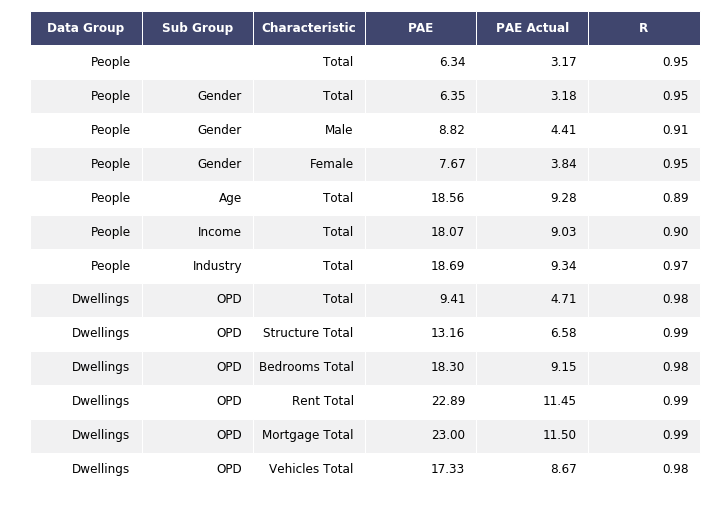

In [21]:
resultTable = {
    'Data Group': [],
    'Sub Group': [],
    'Characteristic': [],
    'PAE': [],
    'PAE Actual': [],
    'R': [],
}
# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
pplDiff = (countPplDiffTotal/countPplTotalPop)*100
pplR = pearsonsR(countPplSP, countPplActual)

resultTable = saveResult(
           dataGroup='People', dataSubGroup='', dataCharacteristic='Total', dataPAE=pplDiff, dataR=pplR,
           xVals=countPplSP, yVals=countPplActual,
           xLab='Synthetic Population', yLab='Table Builder', colour='ro',
           outputTo=outputPath+'1_0_people_total_1.png', resultTable=resultTable
          )

resultTable = saveResult(
           dataGroup='People', dataSubGroup='', dataCharacteristic='Total', dataPAE=None, dataR='-',
           xVals=countPplSA1, yVals=countPplDiff,
           xLab='SA1', yLab='Absolute Difference', colour='ro',
           outputTo=outputPath+'1_0_people_total_2.png', resultTable=resultTable
          )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
tDiff = (comparePopulationDF.colTDiff.sum() / comparePopulationDF.TB_T.sum()) * 100
mDiff = (comparePopulationDF.colMDiff.sum() / comparePopulationDF.TB_M.sum()) * 100
fDiff = (comparePopulationDF.colFDiff.sum() / comparePopulationDF.TB_F.sum()) * 100
tR = pearsonsR(comparePopulationDF.SP_T.values, comparePopulationDF.TB_T.values)
mR = pearsonsR(comparePopulationDF.SP_M.values, comparePopulationDF.TB_M.values)
fR = pearsonsR(comparePopulationDF.SP_F.values, comparePopulationDF.TB_F.values)

resultTable = saveResult(
           dataGroup='People', dataSubGroup='Gender', dataCharacteristic='Total', dataPAE=tDiff, dataR=tR,
           xVals=comparePopulationDF.SP_T.values, yVals=comparePopulationDF.TB_T.values,
           xLab='Synthetic Population', yLab='Table Builder', colour='ko',
           outputTo=outputPath+'2_0_gender_total.png', resultTable=resultTable
          )

resultTable = saveResult(
           dataGroup='People', dataSubGroup='Gender', dataCharacteristic='Male', dataPAE=mDiff, dataR=mR,
           xVals=comparePopulationDF.SP_M.values, yVals=comparePopulationDF.TB_M.values,
           xLab='Synthetic Population', yLab='Table Builder', colour='ko',
           outputTo=outputPath+'2_1_gender_male.png', resultTable=resultTable
          )

resultTable = saveResult(
           dataGroup='People', dataSubGroup='Gender', dataCharacteristic='Female', dataPAE=fDiff, dataR=fR,
           xVals=comparePopulationDF.SP_F.values, yVals=comparePopulationDF.TB_F.values,
           xLab='Synthetic Population', yLab='Table Builder', colour='ko',
           outputTo=outputPath+'2_2_gender_female.png', resultTable=resultTable
          )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
ageDiff = (sum(ageGroupsDiffTotal)/ageGroupsTotalPop)*100
ageR = pearsonsR([el1 for el in ageGroupsSP for el1 in el.values()], [el1 for el in ageGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='People', dataSubGroup='Age', dataCharacteristic='Total', dataPAE=ageDiff, dataR=ageR,
           xVals=ageGroupSA1, yVals=ageGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='bo',
           outputTo=outputPath+'3_0_age_total.png', resultTable=resultTable
          )

for i in range(len(ageGroupsSP[0])):
    resultTable = saveResult(
               dataGroup='People', dataSubGroup='Age', dataCharacteristic='Group {0}'.format(i+1), dataPAE=None, dataR='-',
               xVals=[el[i] for el in ageGroupsSP], yVals=[el[i] for el in ageGroupsActual],
               xLab='Synthetic Population', yLab='Table Builder', colour='bo',
               outputTo='{0}3_{1}_age_group_{2}.png'.format(outputPath, (i+1), (i+1)), resultTable=resultTable
              )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
incDiff = (sum(incGroupsDiffTotal)/incGroupsTotalPop)*100
incR = pearsonsR([el1 for el in incGroupsSP for el1 in el.values()], [el1 for el in incGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='People', dataSubGroup='Income', dataCharacteristic='Total', dataPAE=incDiff, dataR=incR,
           xVals=incGroupSA1, yVals=incGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='go',
           outputTo=outputPath+'4_0_income_total.png', resultTable=resultTable
          )

for i in range(len(incGroupsSP[0])):
    resultTable = saveResult(
               dataGroup='People', dataSubGroup='Income', dataCharacteristic='Group {0}'.format(i+1), dataPAE=None, dataR='-',
               xVals=[el[i] for el in incGroupsSP], yVals=[el[i] for el in incGroupsActual],
               xLab='Synthetic Population', yLab='Table Builder', colour='go',
               outputTo='{0}4_{1}_income_group_{2}.png'.format(outputPath, (i+1), (i+1)), resultTable=resultTable
              )
# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
indDiff = (sum(indGroupsDiffTotal)/indGroupsTotalPop)*100
indR = pearsonsR([el1 for el in indGroupsSP for el1 in el.values()], [el1 for el in indGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='People', dataSubGroup='Industry', dataCharacteristic='Total', dataPAE=indDiff, dataR=indR,
           xVals=indGroupSA1, yVals=indGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='ro',
           outputTo=outputPath+'5_0_industry_total.png', resultTable=resultTable
          )

for i in range(len(indGroupsSP[0])):
    resultTable = saveResult(
               dataGroup='People', dataSubGroup='Industry', dataCharacteristic='Group {0}'.format(i+1), dataPAE=None, dataR='-',
               xVals=[el[i] for el in indGroupsSP], yVals=[el[i] for el in indGroupsActual],
               xLab='Synthetic Population', yLab='Table Builder', colour='go',
               outputTo='{0}5_{1}_industry_group_{2}.png'.format(outputPath, (i+1), (i+1)), resultTable=resultTable
              )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
dwellDiff = (countDwellDiffTotal/countDwellTotalPop)*100
dwellR = pearsonsR(countDwellSP, countDwellActual)
resultTable = saveResult(
           dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Total', dataPAE=dwellDiff, dataR=dwellR,
           xVals=countDwellSP, yVals=countDwellActual,
           xLab='Synthetic Population', yLab='Table Builder', colour='ro',
           outputTo=outputPath+'6_0_dwelling_total_1.png', resultTable=resultTable
          )

resultTable = saveResult(
           dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Total', dataPAE=None, dataR='-',
           xVals=countDwellSA1, yVals=countDwellDiff,
           xLab='SA1', yLab='Absolute Difference', colour='ro',
           outputTo=outputPath+'6_0_dwelling_total_2.png', resultTable=resultTable
          )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
dwellDiff = (sum(strGroupsDiffTotal)/strGroupsTotalPop)*100
strR = pearsonsR([el1 for el in strGroupsSP for el1 in el.values()], [el1 for el in strGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Structure Total', dataPAE=dwellDiff, dataR=strR,
           xVals=strGroupSA1, yVals=strGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='mo',
           outputTo=outputPath+'7_0_dwelling_structure_total.png', resultTable=resultTable
          )

for i in range(len(strGroupsSP[0])):
    resultTable = saveResult(
               dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Structure {0}'.format(i+1), dataPAE=None, dataR='-',
               xVals=[el[i] for el in strGroupsSP], yVals=[el[i] for el in strGroupsActual],
               xLab='Synthetic Population', yLab='Table Builder', colour='mo',
               outputTo='{0}7_{1}_dwelling_structure_{2}.png'.format(outputPath, (i+1), (i+1)), resultTable=resultTable
              )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
dwellDiff = (sum(bedGroupsDiffTotal)/bedGroupsTotalPop)*100
bedR = pearsonsR([el1 for el in bedGroupsSP for el1 in el.values()], [el1 for el in bedGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Bedrooms Total', dataPAE=dwellDiff, dataR=bedR,
           xVals=bedGroupSA1, yVals=bedGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='ro',
           outputTo=outputPath+'8_0_dwelling_bedroom_total.png', resultTable=resultTable
          )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
dwellDiff = (sum(rntGroupsDiffTotal)/rntGroupsTotalPop)*100
rntR = pearsonsR([el1 for el in rntGroupsSP for el1 in el.values()], [el1 for el in rntGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Rent Total', dataPAE=dwellDiff, dataR=rntR,
           xVals=rntGroupSA1, yVals=rntGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='ro',
           outputTo=outputPath+'9_0_dwelling_rent_total.png', resultTable=resultTable
          )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
dwellDiff = (sum(mrgGroupsDiffTotal)/mrgGroupsTotalPop)*100
mrgR = pearsonsR([el1 for el in mrgGroupsSP for el1 in el.values()], [el1 for el in mrgGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Mortgage Total', dataPAE=dwellDiff, dataR=mrgR,
           xVals=mrgGroupSA1, yVals=mrgGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='ro',
           outputTo=outputPath+'10_0_dwelling_mortgage_total.png', resultTable=resultTable
          )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
dwellDiff = (sum(vehGroupsDiffTotal)/vehGroupsTotalPop)*100
vehR = pearsonsR([el1 for el in vehGroupsSP for el1 in el.values()], [el1 for el in vehGroupsActual for el1 in el.values()])
resultTable = saveResult(
           dataGroup='Dwellings', dataSubGroup='OPD', dataCharacteristic='Vehicles Total', dataPAE=dwellDiff, dataR=vehR,
           xVals=vehGroupSA1, yVals=vehGroupsDiffTotal,
           xLab='SA1', yLab='Absolute Difference', colour='ro',
           outputTo=outputPath+'11_0_dwelling_vehicle_total.png', resultTable=resultTable
          )

# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
results = render_mpl_table(pd.DataFrame(data=resultTable), header_columns=0, col_width=2.0)
results.figure.savefig(outputPath+'0_1_table.png')

# Other

------------------------------------------------
:) All employed people have a job.
------------------------------------------------


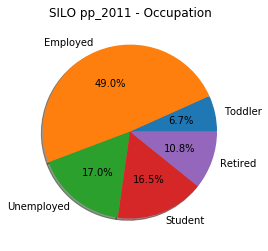

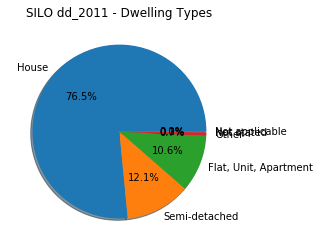

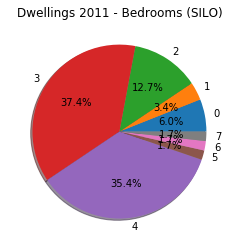

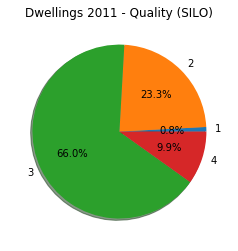

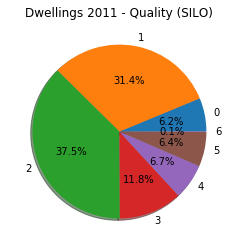

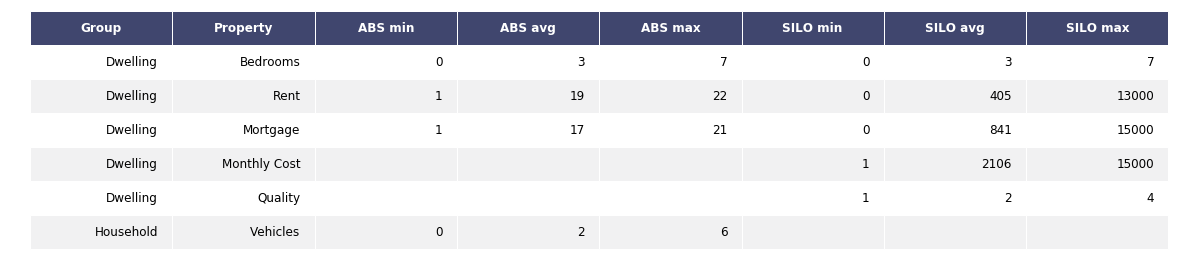

In [30]:
print('------------------------------------------------')
print(ppEmployedPeople())
print('------------------------------------------------')

ppStatsOccupation()
ddStatsType()
ddStatsBedrooms()
ddRent()
ddMortgage()
ddPrice()
ddQuality()
ddCars()

results2 = render_mpl_table(pd.DataFrame(data=basicStats), header_columns=0, col_width=2.55)
results2.figure.savefig(outputPath+'0_2_table.png')

In [23]:
# document.querySelectorAll("div.input").forEach(function(a){a.remove()})